This ipynb file calculates the results in the report

In [21]:
import os
import json
from BenchRunner.utils import *

bbh_tasks = os.listdir('bbh')

acc_prob, total_count = 0, 0
for task_file in bbh_tasks:
    with open(f'bbh/{task_file}') as f:
        data = json.load(f)

    answers = set()
    problem_count = 0

    problems = data['examples']
    for p in problems:
        problem_count += 1
        answers.add(p['target'])

    prob = 1 / len(answers)
    acc_prob += prob * problem_count
    total_count += problem_count

acc_prob /= total_count

acc_prob

0.2572963333745647

In [22]:
base_dir = './results/flan-t5-finetune'
log_lists = os.listdir(base_dir)
finetune_scores = {}

for log in log_lists:
    print(f'----------Parsing {log}----------')
    log_dir = os.path.join(base_dir, log)
    file_list = os.listdir(log_dir)

    total_score, total_missing, total_count = 0, 0, 0
    for file in file_list:
        with open(os.path.join(log_dir, file)) as json_file:
            data = json.load(json_file)
            model_outputs = data['outputs']
            log_acc = data['accuracy']

        score, missing, count = 0, 0, 0
        for output in model_outputs:
            pred, target = output['prediction'], output['target']
            answer = extract_answer(pred)
            if answer is None:
                missing += 1
            elif target == answer:
                score += 1

            count += 1    

        print(f'{file} accuracy: {score}/{count} = {score / count}, missing: {missing}/{count}')
        total_score += score
        total_missing += missing
        total_count += count

    print(f'Total score: {total_score}/{total_count} = {total_score/total_count}')
    print(f'Missing outputs: {total_missing}/{total_count} = {total_missing / total_count}')
    print(f'Adjusted score: {total_score + acc_prob * total_missing}/{total_count} = {(total_score + acc_prob * total_missing) / total_count}')

    finetune_scores[log] = (total_score + acc_prob * total_missing) / total_count


----------Parsing t5-base-cot-longer----------
boolean_expressions.json accuracy: 117/250 = 0.468, missing: 0/250
causal_judgement.json accuracy: 78/187 = 0.41711229946524064, missing: 7/187
date_understanding.json accuracy: 58/250 = 0.232, missing: 29/250
disambiguation_qa.json accuracy: 144/250 = 0.576, missing: 3/250
dyck_languages.json accuracy: 0/250 = 0.0, missing: 249/250
formal_fallacies.json accuracy: 64/250 = 0.256, missing: 3/250
geometric_shapes.json accuracy: 0/250 = 0.0, missing: 1/250
hyperbaton.json accuracy: 147/250 = 0.588, missing: 0/250
logical_deduction_five_objects.json accuracy: 68/250 = 0.272, missing: 3/250
logical_deduction_seven_objects.json accuracy: 51/250 = 0.204, missing: 10/250
logical_deduction_three_objects.json accuracy: 101/250 = 0.404, missing: 1/250
movie_recommendation.json accuracy: 98/250 = 0.392, missing: 22/250
multistep_arithmetic_two.json accuracy: 0/250 = 0.0, missing: 166/250
navigate.json accuracy: 131/250 = 0.524, missing: 1/250
object_c

In [23]:
finetune_scores

{'t5-base-cot-longer': 0.2920284072652785,
 't5-large-cot-longer': 0.35678600297543855,
 't5-xl-cot-longer': 0.38825762428050603}

In [24]:
base_dir = './results/flan-t5-outputs'
log_lists = os.listdir(base_dir)
scores = {}

for log in log_lists:
    if log.endswith('direct'):
        continue

    print(f'----------Parsing {log}----------')
    log_dir = os.path.join(base_dir, log)
    file_list = os.listdir(log_dir)

    total_score, total_missing, total_count = 0, 0, 0
    for file in file_list:
        with open(os.path.join(log_dir, file)) as json_file:
            data = json.load(json_file)
            model_outputs = data['outputs']
            log_acc = data['accuracy']

        score, missing, count = 0, 0, 0
        for output in model_outputs:
            pred, target = output['prediction'], output['target']
            answer = extract_answer(pred)
            if answer is None:
                missing += 1
            elif target == answer:
                score += 1

            count += 1    

        print(f'{file} accuracy: {score}/{count} = {score / count}, missing: {missing}/{count}')
        total_score += score
        total_missing += missing
        total_count += count

    print(f'Total score: {total_score}/{total_count} = {total_score/total_count}')
    print(f'Missing outputs: {total_missing}/{total_count} = {total_missing / total_count}')
    print(f'Adjusted score: {total_score + acc_prob * total_missing}/{total_count} = {(total_score + acc_prob * total_missing) / total_count}')

    scores[log] = (total_score + acc_prob * total_missing) / total_count


----------Parsing flan-t5-base-outputs----------
boolean_expressions.json accuracy: 114/250 = 0.456, missing: 12/250
causal_judgement.json accuracy: 54/187 = 0.2887700534759358, missing: 6/187
date_understanding.json accuracy: 55/250 = 0.22, missing: 36/250
disambiguation_qa.json accuracy: 142/250 = 0.568, missing: 5/250
dyck_languages.json accuracy: 0/250 = 0.0, missing: 250/250
formal_fallacies.json accuracy: 106/250 = 0.424, missing: 5/250
geometric_shapes.json accuracy: 23/250 = 0.092, missing: 31/250
hyperbaton.json accuracy: 152/250 = 0.608, missing: 2/250
logical_deduction_five_objects.json accuracy: 57/250 = 0.228, missing: 13/250
logical_deduction_seven_objects.json accuracy: 46/250 = 0.184, missing: 28/250
logical_deduction_three_objects.json accuracy: 103/250 = 0.412, missing: 1/250
movie_recommendation.json accuracy: 94/250 = 0.376, missing: 28/250
multistep_arithmetic_two.json accuracy: 2/250 = 0.008, missing: 69/250
navigate.json accuracy: 122/250 = 0.488, missing: 29/250

In [25]:
base_dir = './results/flan-t5-outputs'
log_lists = os.listdir(base_dir)
direct_scores = {}

for log in log_lists:
    if not log.endswith('direct'):
        continue

    print(f'----------Parsing {log}----------')
    log_dir = os.path.join(base_dir, log)
    file_list = os.listdir(log_dir)

    total_score, total_missing, total_count = 0, 0, 0
    for file in file_list:
        with open(os.path.join(log_dir, file)) as json_file:
            data = json.load(json_file)
            model_outputs = data['outputs']
            log_acc = data['accuracy']

        score, missing, count = 0, 0, 0
        for output in model_outputs:
            pred, target = output['prediction'], output['target']
            answer = extract_answer(pred)
            if answer is None:
                missing += 1
            elif target == answer:
                score += 1

            count += 1    

        print(f'{file} accuracy: {score}/{count} = {score / count}, missing: {missing}/{count}')
        total_score += score
        total_missing += missing
        total_count += count

    print(f'Total score: {total_score}/{total_count} = {total_score/total_count}')
    print(f'Missing outputs: {total_missing}/{total_count} = {total_missing / total_count}')
    print(f'Adjusted score: {total_score + acc_prob * total_missing}/{total_count} = {(total_score + acc_prob * total_missing) / total_count}')

    direct_scores[log] = (total_score + acc_prob * total_missing) / total_count


----------Parsing flan-t5-base-outputs-direct----------
boolean_expressions.json accuracy: 0/250 = 0.0, missing: 250/250
causal_judgement.json accuracy: 5/187 = 0.026737967914438502, missing: 138/187
date_understanding.json accuracy: 19/250 = 0.076, missing: 161/250
disambiguation_qa.json accuracy: 0/250 = 0.0, missing: 250/250
dyck_languages.json accuracy: 0/250 = 0.0, missing: 250/250
formal_fallacies.json accuracy: 30/250 = 0.12, missing: 195/250
geometric_shapes.json accuracy: 0/250 = 0.0, missing: 237/250
hyperbaton.json accuracy: 58/250 = 0.232, missing: 158/250
logical_deduction_five_objects.json accuracy: 4/250 = 0.016, missing: 233/250
logical_deduction_seven_objects.json accuracy: 2/250 = 0.008, missing: 243/250
logical_deduction_three_objects.json accuracy: 26/250 = 0.104, missing: 194/250
movie_recommendation.json accuracy: 44/250 = 0.176, missing: 136/250
multistep_arithmetic_two.json accuracy: 0/250 = 0.0, missing: 250/250
navigate.json accuracy: 10/250 = 0.04, missing: 6

In [26]:
scores.pop('flan-t5-small-outputs')
direct_scores.pop('flan-t5-small-outputs-direct')

0.26155536040051836

In [27]:
print(finetune_scores)
print(scores)
print(direct_scores)

{'t5-base-cot-longer': 0.2920284072652785, 't5-large-cot-longer': 0.35678600297543855, 't5-xl-cot-longer': 0.38825762428050603}
{'flan-t5-base-outputs': 0.29543832438116524, 'flan-t5-large-outputs': 0.3543388807223694, 'flan-t5-xl-outputs': 0.37094107147222233}
{'flan-t5-base-outputs-direct': 0.26277250010969716, 'flan-t5-large-outputs-direct': 0.26513739817954146, 'flan-t5-xl-outputs-direct': 0.29090559307008657}


In [28]:
# x_values = [0.077, 0.248, 0.783, 2.85]
# model_scales = ['small', 'base', 'large','xl']

x_values = [0.248, 0.783, 2.85]
model_scales = ['base', 'large','xl']

scores_direct = [direct_scores[f'flan-t5-{m}-outputs-direct'] for m in model_scales]
scores_cot = [scores[f'flan-t5-{m}-outputs'] for m in model_scales]
scores_finetune = [finetune_scores[f't5-{m}-cot-longer'] for m in model_scales]

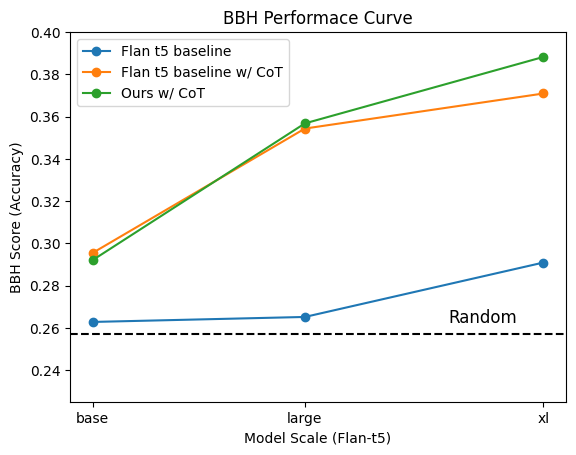

In [29]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(x_values, scores_direct, label='Flan t5 baseline', marker='o')
plt.plot(x_values, scores_cot, label='Flan t5 baseline w/ CoT', marker='o')
plt.plot(x_values, scores_finetune, label='Ours w/ CoT', marker='o')

# Adding labels and title
plt.xlabel('Model Scale (Flan-t5)')
plt.ylabel('BBH Score (Accuracy)')
plt.title('BBH Performace Curve')

plt.ylim(0.225, 0.4)
plt.xscale('log')

plt.xticks(x_values, model_scales)
# Adding legend
plt.legend()

plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.axhline(y=acc_prob, linestyle='--', color='black')
plt.text(x=1.7, y=acc_prob + 0.005, s='Random', fontsize=12, color='black')
# Displaying the plot
plt.show()

In [30]:
base_dir = './results/flan-t5-finetune'
log_lists = os.listdir(base_dir)
finetune_scores = {}

for log in log_lists:
    print(f'----------Parsing {log}----------')
    log_dir = os.path.join(base_dir, log)
    file_list = os.listdir(log_dir)

    total_score, total_missing, total_count = 0, 0, 0
    for file in file_list:
        with open(os.path.join(log_dir, file)) as json_file:
            data = json.load(json_file)
            model_outputs = data['outputs']
            log_acc = data['accuracy']

        score, missing, count = 0, 0, 0
        for output in model_outputs:
            pred, target = output['prediction'], output['target']
            answer = extract_answer(pred)
            if answer is None:
                missing += 1
            elif target == answer:
                score += 1

            count += 1    

        print(f'{file} accuracy: {score}/{count} = {score / count}, missing: {missing}/{count}')
        total_score += score
        total_missing += missing
        total_count += count

    print(f'Total score: {total_score}/{total_count} = {total_score/total_count}')
    print(f'Missing outputs: {total_missing}/{total_count} = {total_missing / total_count}')
    finetune_scores[log] = total_score / total_count


----------Parsing t5-base-cot-longer----------
boolean_expressions.json accuracy: 117/250 = 0.468, missing: 0/250
causal_judgement.json accuracy: 78/187 = 0.41711229946524064, missing: 7/187
date_understanding.json accuracy: 58/250 = 0.232, missing: 29/250
disambiguation_qa.json accuracy: 144/250 = 0.576, missing: 3/250
dyck_languages.json accuracy: 0/250 = 0.0, missing: 249/250
formal_fallacies.json accuracy: 64/250 = 0.256, missing: 3/250
geometric_shapes.json accuracy: 0/250 = 0.0, missing: 1/250
hyperbaton.json accuracy: 147/250 = 0.588, missing: 0/250
logical_deduction_five_objects.json accuracy: 68/250 = 0.272, missing: 3/250
logical_deduction_seven_objects.json accuracy: 51/250 = 0.204, missing: 10/250
logical_deduction_three_objects.json accuracy: 101/250 = 0.404, missing: 1/250
movie_recommendation.json accuracy: 98/250 = 0.392, missing: 22/250
multistep_arithmetic_two.json accuracy: 0/250 = 0.0, missing: 166/250
navigate.json accuracy: 131/250 = 0.524, missing: 1/250
object_c

In [31]:
import numpy as np

# Remove dyck_languages, multistep_arithmetic_two, word_sorting
full_tasks = ['boolean_expressions', 'causal_judgement', 'date_understanding', 'disambiguation_qa',
              'dyck_languages', 'formal_fallacies', 'geometric_shapes', 'hyperbaton',
              'logical_deduction_five_objects', 'logical_deduction_seven_objects', 'logical_deduction_three_objects',
              'movie_recommendation', 'multistep_arithmetic_two', 'navigate', 'object_counting',
              'penguins_in_a_table', 'reasoning_about_colored_objects', 'ruin_names',
              'salient_translation_error_detection', 'snarks', 'sports_understanding', 'temporal_sequences',
              'tracking_shuffled_objects_five_objects', 'tracking_shuffled_objects_seven_objects',
              'tracking_shuffled_objects_three_objects', 'web_of_lies', 'word_sorting']

full_tasks.remove('dyck_languages')
full_tasks.remove('multistep_arithmetic_two')
full_tasks.remove('word_sorting')

np.random.seed(1)
selected_tasks = np.random.choice(full_tasks, 10, replace=False)

print(selected_tasks)

['penguins_in_a_table' 'sports_understanding' 'disambiguation_qa'
 'reasoning_about_colored_objects'
 'tracking_shuffled_objects_five_objects' 'snarks' 'movie_recommendation'
 'formal_fallacies' 'date_understanding' 'temporal_sequences']


In [32]:
base_dir = './results/flan-t5-finetune'
log_lists = os.listdir(base_dir)
finetune_scores = {}

for log in log_lists:
    if 'xl' not in log:
        continue

    if log.endswith('direct'):
        continue
    print(f'----------Parsing {log}----------')
    log_dir = os.path.join(base_dir, log)
    file_list = os.listdir(log_dir)

    total_score, total_missing, total_count = 0, 0, 0
    for file in file_list:
        # if file[:-5] not in selected_tasks:
        #     continue

        with open(os.path.join(log_dir, file)) as json_file:
            data = json.load(json_file)
            model_outputs = data['outputs']
            log_acc = data['accuracy']

        score, missing, count = 0, 0, 0
        for output in model_outputs:
            pred, target = output['prediction'], output['target']
            answer = extract_answer(pred)
            if answer is None:
                missing += 1
            elif target == answer:
                score += 1

            count += 1    

        print(f'{file} accuracy: {score}/{count} = {score / count}, missing: {missing}/{count}')
        finetune_scores[file[:-5]] = score / count
        total_score += score
        total_missing += missing
        total_count += count

    print(f'Total score: {total_score}/{total_count} = {total_score/total_count}')
    print(f'Missing outputs: {total_missing}/{total_count} = {total_missing / total_count}')
    # finetune_scores[log] = total_score / total_count


----------Parsing t5-xl-cot-longer----------
boolean_expressions.json accuracy: 153/250 = 0.612, missing: 0/250
causal_judgement.json accuracy: 106/187 = 0.5668449197860963, missing: 1/187
date_understanding.json accuracy: 112/250 = 0.448, missing: 1/250
disambiguation_qa.json accuracy: 177/250 = 0.708, missing: 0/250
dyck_languages.json accuracy: 0/250 = 0.0, missing: 190/250
formal_fallacies.json accuracy: 130/250 = 0.52, missing: 0/250
geometric_shapes.json accuracy: 53/250 = 0.212, missing: 0/250
hyperbaton.json accuracy: 169/250 = 0.676, missing: 6/250
logical_deduction_five_objects.json accuracy: 83/250 = 0.332, missing: 0/250
logical_deduction_seven_objects.json accuracy: 68/250 = 0.272, missing: 0/250
logical_deduction_three_objects.json accuracy: 150/250 = 0.6, missing: 0/250
movie_recommendation.json accuracy: 129/250 = 0.516, missing: 2/250
multistep_arithmetic_two.json accuracy: 0/250 = 0.0, missing: 247/250
navigate.json accuracy: 116/250 = 0.464, missing: 1/250
object_cou

In [33]:
finetune_scores

{'boolean_expressions': 0.612,
 'causal_judgement': 0.5668449197860963,
 'date_understanding': 0.448,
 'disambiguation_qa': 0.708,
 'dyck_languages': 0.0,
 'formal_fallacies': 0.52,
 'geometric_shapes': 0.212,
 'hyperbaton': 0.676,
 'logical_deduction_five_objects': 0.332,
 'logical_deduction_seven_objects': 0.272,
 'logical_deduction_three_objects': 0.6,
 'movie_recommendation': 0.516,
 'multistep_arithmetic_two': 0.0,
 'navigate': 0.464,
 'object_counting': 0.168,
 'penguins_in_a_table': 0.2328767123287671,
 'reasoning_about_colored_objects': 0.46,
 'ruin_names': 0.34,
 'salient_translation_error_detection': 0.292,
 'snarks': 0.5561797752808989,
 'sports_understanding': 0.584,
 'temporal_sequences': 0.268,
 'tracking_shuffled_objects_five_objects': 0.14,
 'tracking_shuffled_objects_seven_objects': 0.12,
 'tracking_shuffled_objects_three_objects': 0.336,
 'web_of_lies': 0.472,
 'word_sorting': 0.024}

In [34]:
base_dir = './results/flan-t5-outputs'
log_lists = os.listdir(base_dir)
scores = {}

for log in log_lists:
    if 'xl' not in log:
        continue
    
    if log.endswith('direct'):
        continue
    print(f'----------Parsing {log}----------')
    log_dir = os.path.join(base_dir, log)
    file_list = os.listdir(log_dir)

    total_score, total_missing, total_count = 0, 0, 0
    for file in file_list:
        # if file[:-5] not in selected_tasks:
        #     continue

        with open(os.path.join(log_dir, file)) as json_file:
            data = json.load(json_file)
            model_outputs = data['outputs']
            log_acc = data['accuracy']

        score, missing, count = 0, 0, 0
        for output in model_outputs:
            pred, target = output['prediction'], output['target']
            answer = extract_answer(pred)
            if answer is None:
                missing += 1
            elif target == answer:
                score += 1

            count += 1    

        print(f'{file} accuracy: {score}/{count} = {score / count}, missing: {missing}/{count}')
        scores[file[:-5]] = score / count
        total_score += score
        total_missing += missing
        total_count += count

    print(f'Total score: {total_score}/{total_count} = {total_score/total_count}')
    print(f'Missing outputs: {total_missing}/{total_count} = {total_missing / total_count}')
    # finetune_scores[log] = total_score / total_count


----------Parsing flan-t5-xl-outputs----------
boolean_expressions.json accuracy: 123/250 = 0.492, missing: 19/250
causal_judgement.json accuracy: 107/187 = 0.5721925133689839, missing: 1/187
date_understanding.json accuracy: 100/250 = 0.4, missing: 8/250
disambiguation_qa.json accuracy: 158/250 = 0.632, missing: 21/250
dyck_languages.json accuracy: 0/250 = 0.0, missing: 131/250
formal_fallacies.json accuracy: 138/250 = 0.552, missing: 0/250
geometric_shapes.json accuracy: 37/250 = 0.148, missing: 39/250
hyperbaton.json accuracy: 171/250 = 0.684, missing: 0/250
logical_deduction_five_objects.json accuracy: 78/250 = 0.312, missing: 1/250
logical_deduction_seven_objects.json accuracy: 73/250 = 0.292, missing: 0/250
logical_deduction_three_objects.json accuracy: 133/250 = 0.532, missing: 0/250
movie_recommendation.json accuracy: 122/250 = 0.488, missing: 4/250
multistep_arithmetic_two.json accuracy: 1/250 = 0.004, missing: 186/250
navigate.json accuracy: 120/250 = 0.48, missing: 3/250
obj

In [35]:
scores

{'boolean_expressions': 0.492,
 'causal_judgement': 0.5721925133689839,
 'date_understanding': 0.4,
 'disambiguation_qa': 0.632,
 'dyck_languages': 0.0,
 'formal_fallacies': 0.552,
 'geometric_shapes': 0.148,
 'hyperbaton': 0.684,
 'logical_deduction_five_objects': 0.312,
 'logical_deduction_seven_objects': 0.292,
 'logical_deduction_three_objects': 0.532,
 'movie_recommendation': 0.488,
 'multistep_arithmetic_two': 0.004,
 'navigate': 0.48,
 'object_counting': 0.168,
 'penguins_in_a_table': 0.2876712328767123,
 'reasoning_about_colored_objects': 0.496,
 'ruin_names': 0.256,
 'salient_translation_error_detection': 0.256,
 'snarks': 0.5898876404494382,
 'sports_understanding': 0.572,
 'temporal_sequences': 0.228,
 'tracking_shuffled_objects_five_objects': 0.128,
 'tracking_shuffled_objects_seven_objects': 0.112,
 'tracking_shuffled_objects_three_objects': 0.324,
 'web_of_lies': 0.512,
 'word_sorting': 0.02}

In [36]:
base_dir = './results/flan-t5-dpo'
log_lists = os.listdir(base_dir)
finetune_scores = {}

for log in log_lists:
    print(f'----------Parsing {log}----------')
    log_dir = os.path.join(base_dir, log)
    file_list = os.listdir(log_dir)

    total_score, total_missing, total_count = 0, 0, 0
    for file in file_list:
        with open(os.path.join(log_dir, file)) as json_file:
            data = json.load(json_file)
            model_outputs = data['outputs']
            log_acc = data['accuracy']

        score, missing, count = 0, 0, 0
        for output in model_outputs:
            pred, target = output['prediction'], output['target']
            answer = extract_answer(pred)
            if answer is None:
                missing += 1
            elif target == answer:
                score += 1

            count += 1    

        print(f'{file} accuracy: {score}/{count} = {score / count}, missing: {missing}/{count}')
        total_score += score
        total_missing += missing
        total_count += count

    print(f'Total score: {total_score}/{total_count} = {total_score/total_count}')
    print(f'Missing outputs: {total_missing}/{total_count} = {total_missing / total_count}')
    print(f'Adjusted score: {total_score + acc_prob * total_missing}/{total_count} = {(total_score + acc_prob * total_missing) / total_count}')

    finetune_scores[log] = (total_score + acc_prob * total_missing) / total_count


----------Parsing t5-dpo-0.5-full-results----------
boolean_expressions.json accuracy: 110/250 = 0.44, missing: 18/250
causal_judgement.json accuracy: 93/187 = 0.49732620320855614, missing: 6/187
date_understanding.json accuracy: 73/250 = 0.292, missing: 8/250
disambiguation_qa.json accuracy: 158/250 = 0.632, missing: 0/250
dyck_languages.json accuracy: 0/250 = 0.0, missing: 236/250
formal_fallacies.json accuracy: 107/250 = 0.428, missing: 6/250
geometric_shapes.json accuracy: 27/250 = 0.108, missing: 16/250
hyperbaton.json accuracy: 142/250 = 0.568, missing: 7/250
logical_deduction_five_objects.json accuracy: 83/250 = 0.332, missing: 0/250
logical_deduction_seven_objects.json accuracy: 55/250 = 0.22, missing: 2/250
logical_deduction_three_objects.json accuracy: 117/250 = 0.468, missing: 0/250
movie_recommendation.json accuracy: 92/250 = 0.368, missing: 9/250
multistep_arithmetic_two.json accuracy: 0/250 = 0.0, missing: 143/250
navigate.json accuracy: 113/250 = 0.452, missing: 3/250
ob

In [37]:
base_dir = './results/opt-1.3b-dpo'
log_lists = os.listdir(base_dir)
finetune_scores = {}

for log in log_lists:
    print(f'----------Parsing {log}----------')
    log_dir = os.path.join(base_dir, log)
    file_list = os.listdir(log_dir)

    total_score, total_missing, total_count = 0, 0, 0
    for file in file_list:
        with open(os.path.join(log_dir, file)) as json_file:
            data = json.load(json_file)
            model_outputs = data['outputs']
            log_acc = data['accuracy']

        score, missing, count = 0, 0, 0
        for output in model_outputs:
            pred, target = output['prediction'], output['target']
            answer = extract_answer(pred)
            if answer is None:
                missing += 1
            elif target == answer:
                score += 1

            count += 1    

        print(f'{file} accuracy: {score}/{count} = {score / count}, missing: {missing}/{count}')
        total_score += score
        total_missing += missing
        total_count += count

    print(f'Total score: {total_score}/{total_count} = {total_score/total_count}')
    print(f'Missing outputs: {total_missing}/{total_count} = {total_missing / total_count}')
    print(f'Adjusted score: {total_score + acc_prob * total_missing}/{total_count} = {(total_score + acc_prob * total_missing) / total_count}')

    finetune_scores[log] = (total_score + acc_prob * total_missing) / total_count


----------Parsing opt-full-data-dpo----------
boolean_expressions.json accuracy: 124/250 = 0.496, missing: 10/250
causal_judgement.json accuracy: 64/187 = 0.3422459893048128, missing: 4/187
date_understanding.json accuracy: 0/250 = 0.0, missing: 0/250
disambiguation_qa.json accuracy: 0/250 = 0.0, missing: 3/250
dyck_languages.json accuracy: 0/250 = 0.0, missing: 48/250
formal_fallacies.json accuracy: 48/250 = 0.192, missing: 12/250
geometric_shapes.json accuracy: 0/250 = 0.0, missing: 250/250
hyperbaton.json accuracy: 45/250 = 0.18, missing: 14/250
logical_deduction_five_objects.json accuracy: 0/250 = 0.0, missing: 0/250
logical_deduction_seven_objects.json accuracy: 0/250 = 0.0, missing: 2/250
logical_deduction_three_objects.json accuracy: 0/250 = 0.0, missing: 1/250
movie_recommendation(1).json accuracy: 3/250 = 0.012, missing: 15/250
movie_recommendation.json accuracy: 3/250 = 0.012, missing: 15/250
multistep_arithmetic_two.json accuracy: 0/250 = 0.0, missing: 239/250
navigate.json 